# 1. Introduction
    
### The goal of the project is to apply all of the studied algorithms in the Data Mining laboratories to a dataset. To achive that i chose to analyse the news feed data from 50 different news sources.

# 2. Problem statement
   
### In the process of digitization the number of digital documents is constantly growing. Data mining is useful to extract only the relevant information from a big dataset in a timely manner.


# 3. Dataset description 

### To avoid creating a web scraper from scratch i used an external [API](https://newsapi.org) to collect the news data. Upon sending a get request to the api it returns a JSON file containing the latest 10 news articles and the news source. After that i store them in a dataframe and remove the duplicate articles and the ones with no description.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
#2d0535bc1c3c4a66907b3bf8962cd336
API_KEY = 'f5390c440d7443c78c669cddd6ccf7f8'
NEWS_API = 'https://newsapi.org/v1/sources?language=en'

response = requests.get(NEWS_API).json()

source_list = []
for source in response['sources']:
        source_list.append(source['id'])
source_list

category = {}
response = requests.get(NEWS_API)
response = response.json()
for s in response['sources']:
    category[s['id']] = s['category']
category

{'abc-news-au': 'general',
 'al-jazeera-english': 'general',
 'ars-technica': 'technology',
 'associated-press': 'general',
 'bbc-news': 'general',
 'bbc-sport': 'sports',
 'bloomberg': 'business',
 'breitbart-news': 'general',
 'business-insider': 'business',
 'business-insider-uk': 'business',
 'buzzfeed': 'entertainment',
 'cnn': 'general',
 'engadget': 'technology',
 'entertainment-weekly': 'entertainment',
 'espn': 'sports',
 'espn-cric-info': 'sports',
 'financial-times': 'business',
 'football-italia': 'sports',
 'fortune': 'business',
 'four-four-two': 'sports',
 'fox-sports': 'sports',
 'google-news': 'general',
 'hacker-news': 'technology',
 'ign': 'entertainment',
 'independent': 'general',
 'mashable': 'entertainment',
 'mtv-news': 'entertainment',
 'mtv-news-uk': 'entertainment',
 'national-geographic': 'science',
 'new-scientist': 'science',
 'newsweek': 'general',
 'new-york-magazine': 'general',
 'nfl-news': 'sports',
 'polygon': 'entertainment',
 'recode': 'technology'

In [2]:
URL = 'https://newsapi.org/v1/articles?source={0}&sortBy={1}&apiKey={2}'
    
responses = []
for source in source_list:
    try:
        u = URL.format(source,'popularity',API_KEY)
    except: 
        print(source, "error")
        continue
    
    response = requests.get(u)
    r = response.json()
    
    try:
        for article in r['articles']:
            article['source'] = source;
            responses.append(article);
    except:
        print(r['code'])
            
    print(source, u, " - done")
   

abc-news-au https://newsapi.org/v1/articles?source=abc-news-au&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
al-jazeera-english https://newsapi.org/v1/articles?source=al-jazeera-english&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
ars-technica https://newsapi.org/v1/articles?source=ars-technica&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
associated-press https://newsapi.org/v1/articles?source=associated-press&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
bbc-news https://newsapi.org/v1/articles?source=bbc-news&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
bbc-sport https://newsapi.org/v1/articles?source=bbc-sport&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
bloomberg https://newsapi.org/v1/articles?source=bloomberg&sortBy=popularity&apiKey=f5390c440d7443c78c669cddd6ccf7f8  - done
breitbart-news https://newsapi.org/v1/articles?source=breitbart-news&sortBy=popularit

<AxesSubplot:>

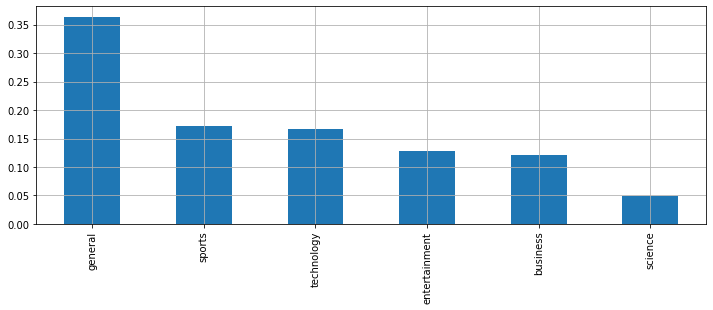

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import numpy as np

def addType(source):
    return category[source]

news = pd.DataFrame(responses)
news = news.drop_duplicates()
news = news.dropna(subset=['description'])
#news.drop(['urlToImage'], inplace=True, axis=1)

news['category'] = news['source'].map(lambda s: addType(s))

news = news[news.description.map(len) >= 50]

news = news.reset_index()
news = news.drop(columns='index')

news.category.value_counts(normalize=True).plot(kind='bar', grid=True, figsize=(12, 4))

In [4]:
news.head(5)

,author,title,description,url,urlToImage,publishedAt,source,category
0,Tracey Holmes,IOC offers medical help for Tokyo Olympics as ...,A day after the Tokyo Medical Practitioners As...,http://www.abc.net.au/news/2021-05-19/tokyo-ol...,https://live-production.wcms.abc-cdn.net.au/cd...,2021-05-19T12:41:51Z,abc-news-au,general
1,ABC News,UK police to excavate cafe in search for remai...,Police are set to excavate a cafe in England's...,http://www.abc.net.au/news/2021-05-19/possible...,https://live-production.wcms.abc-cdn.net.au/30...,2021-05-19T09:00:53Z,abc-news-au,general
2,Jano Gibson,NT government concludes investigation into com...,The NT government says it has concluded an inv...,http://www.abc.net.au/news/2021-05-19/nt-treat...,https://live-production.wcms.abc-cdn.net.au/14...,2021-05-19T08:38:49Z,abc-news-au,general
3,ABC News,Australian citizen Sunil Khanna dies from COVI...,A 51-year-old Australian man dies in India fro...,http://www.abc.net.au/news/2021-05-19/australi...,https://live-production.wcms.abc-cdn.net.au/86...,2021-05-19T08:38:49Z,abc-news-au,general
4,ABC News,Somerton Man remains exhumed after dig in Adel...,The Somerton Man is exhumed from his resting p...,http://www.abc.net.au/news/2021-05-19/somerton...,https://live-production.wcms.abc-cdn.net.au/b2...,2021-05-19T08:07:18Z,abc-news-au,general


# 4. Data cleaning

### For cleaning the data i used the custom stop-words presented in the laboratory appended with the punctuation signs and the stop-words provided by the [Natural Language Toolkit](https://www.nltk.org). Before applying the stop-words filter i use the lower() method to make all the characters lowercase and remove all numbers and the contractions from the texts before tokenizing the description from the dataframe.

In [5]:
from nltk.corpus import stopwords
from string import punctuation
from tidytext import *
from siuba import *

stop_words = []
punctuation_signs = ['','"','<','>','-','--','—','–','_','`',"'",'``','\'', '"', ',',",", '.', '!', '?', '/', '[', ']', '(', ')', '“', '”', '’', '‘',':', ';', '&', '``', "''",'|','$','%','*','#',"#",'@','!','&','(',')']
custom_stop_words = ['...','a','the','rsquo','lsquo','to',"a","al","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what",'what',"when","where","which","while","who","whom","why","will","with",'with',"won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder","of","000","mon"]
stop_words.extend(punctuation_signs)
stop_words.extend(custom_stop_words)
stop_words.extend(stopwords.words('english'))
len(stop_words)

1019

In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w+]\d+', '', text)
    text = re.sub(r'(^.*com)', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = text.strip()
    return text

def tokenizer(text):
    text = clean_text(text)    
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if not word in stop_words]
    return tokens

news['description'] = news['description'].map(lambda d: str(d))
news['tokens'] = news['description'].map(lambda d: tokenizer(d))
news['tokens']

0                                                 [pete]
1      [police, set, excavate, cafe, england, west, s...
2                                                     []
3                                            [ing, sick]
4      [somerton, man, exhumed, resting, place, adela...
                             ...                        
402    [deadliest, violence, years, israelis, palesti...
403    [colleges, supposed, elevate, students, lives,...
404    [massachusetts, medical, examiner, office, rul...
405    [nonbinary, changing, pronouns, they/them, sin...
406    [people, work, full-time, covid, eases, cite, ...
Name: tokens, Length: 407, dtype: object

# 5. Analyzing word and document frequency

### An approach for analyzing the importance of a word in the collection of the news is to calculate the tf-idf. 
### Tf-idf is intended to measure how important a word in the collection of the articles. To obtain the tf-idf i use [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from sklearn on the words that have a document frequency strictly lower than 2

top 10 keywords [('people', 22), ('news', 21), ('years', 15), ('israel', 15), ('tuesday', 15), ('gaza', 15), ('president', 14), ('day', 13), ('covid', 13), ('pany', 12)]


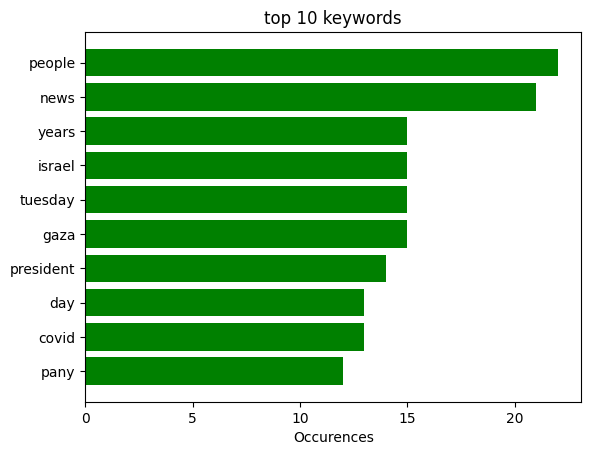

In [7]:
import matplotlib.pyplot as plt
from plotnine import ggplot
from collections import Counter 

alltokens = []
def keywords(tokens):
    for i in range(len(tokens)):
        try:
            for token in tokens[i]:
                alltokens.append(token)
        except: 
            continue
    counter = Counter(alltokens)
    return counter.most_common(10)
most_used_words = keywords(news['tokens'])
length = len(most_used_words)
title = 'top ' + str(length) + ' keywords'
print(title, most_used_words)

arr1 = []
arr2 = []
for i in range(0,length):
    arr1.append(most_used_words[i][0])
    arr2.append(most_used_words[i][1])

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(length)

ax.barh(y_pos, arr2, align='center',
        color='green', ecolor='none')
ax.set_yticks(y_pos)
ax.set_yticklabels(arr1)
ax.invert_yaxis()
ax.set_xlabel('Occurences')
ax.set_title(title)

plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

alltokens_df = pd.DataFrame(alltokens)
alltokens_df.columns= ['word']
alltokens_df = count(alltokens_df, _.word, sort=True)

vectorizer = TfidfVectorizer(min_df=2, analyzer='word', ngram_range=(1, 1), stop_words=stop_words)
vz = vectorizer.fit_transform(alltokens_df['word'])

tf_idf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tf_idf = pd.DataFrame().from_dict(dict(tf_idf), orient='index')

tf_idf = tf_idf.reset_index()
tf_idf.columns = ['word','tf_idf']

ordered_tf_idf = arrange(tf_idf, -_.tf_idf)
ordered_tf_idf = ordered_tf_idf.reset_index()
ordered_tf_idf = ordered_tf_idf.drop(columns=['index'])

ordered_tf_idf['tf_idf'] = ordered_tf_idf['tf_idf']/ordered_tf_idf['tf_idf'][0]
ordered_tf_idf

,word,tf_idf
0,ability,1.000000
1,action,1.000000
2,add,1.000000
3,amc,1.000000
4,attention,1.000000
...,...,...
58,play,0.963376
59,summer,0.963376
60,winning,0.963376
61,high,0.911758


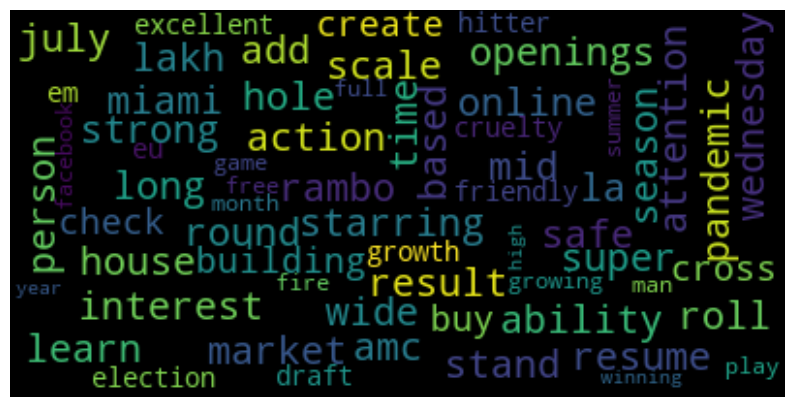

In [9]:
from wordcloud import WordCloud
    
def plot_word_cloud(terms):
    words = terms.word
    words = ' '.join(list(words))
    wordcloud = WordCloud(max_font_size=20).generate(words)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
plot_word_cloud(tf_idf.sort_values(by=['tf_idf'], ascending=False))

# 6. Relationship between words (N-grams)

### Similar to the single word tf-idf but now using [bind_tf_idf function](https://www.rdocumentation.org/packages/tidytext/versions/0.3.1/topics/bind_tf_idf) from tidytext and plot the 

In [10]:
from nltk import * 
bigrams_df = pd.DataFrame()
for i in range(0,len(news['description'])):
    try:
        bigrams_generator = ngrams(word_tokenize(news['description'][i]), 2)
        bigrams = [ ' '.join(grams) for grams in bigrams_generator]
        bigrams_df = bigrams_df.append(pd.DataFrame({
                "source": news['source'][i],
                "bigrams": bigrams,
            }))
        bigrams_df = bigrams_df.reset_index(drop=True)
    except: 
        continue

bigrams_df = count(bigrams_df, _.source, _.bigrams, sort=True)

bigrams_df[['word1', 'word2']] = bigrams_df['bigrams'].str.split(expand=True)   

bigrams_df['word1'] = bigrams_df['word1'].map(lambda d: clean_text(d))
bigrams_df['word2'] = bigrams_df['word2'].map(lambda d: clean_text(d)) 
bigrams_df_clean = bigrams_df[~bigrams_df.word1.isin(stop_words)] #clean word1
bigrams_df_clean = bigrams_df_clean[~bigrams_df_clean.word2.isin(stop_words)] #clean word2 

bigrams_df_clean =bigrams_df_clean.reset_index(drop=True)
 
#bigrams_df_clean = bigrams_df_clean.drop(columns=['level_0', 'index'])
bigrams_df_clean

,source,bigrams,n,word1,word2
0,reuters,President Donald,6,president,donald
1,reuters,Donald Trump,6,donald,trump
2,the-times-of-india,India News,5,india,news
3,reuters,U.S. Supreme,3,u.s.,supreme
4,reuters,United States,3,united,states
...,...,...,...,...,...
2054,financial-times,Legal battle,1,legal,battle
2055,financial-times,Gaza aerial,1,gaza,aerial
2056,financial-times,European bloc,1,european,bloc
2057,espn-cric-info,white-ball cricket,1,white-ball,cricket


In [11]:
bigrams_freq = count(bigrams_df_clean, _.bigrams, _.word1, _.word2, sort=True)

bigrams_tf_idf = bind_tf_idf(bigrams_freq, 'bigrams', 'word1',  'n')
bigrams_tf_idf = arrange(bigrams_tf_idf, -_.tf_idf)

bigrams_tf_idf = bigrams_tf_idf.reset_index()
bigrams_tf_idf = bigrams_tf_idf.drop(columns=['index'])

bigrams_tf_idf['tf_idf'] = bigrams_tf_idf['tf_idf']/bigrams_tf_idf['tf_idf'][0]
bigrams_tf_idf

,bigrams,word1,word2,n,tf,idf,tf_idf
0,Donald Trump,donald,trump,3,1.000000,7.26892,1.000000
1,Premier League,premier,league,3,1.000000,7.26892,1.000000
2,Bill Gates,bill,gates,3,1.000000,7.26892,1.000000
3,Letitia James,letitia,james,3,1.000000,7.26892,1.000000
4,spent millions,spent,millions,3,1.000000,7.26892,1.000000
...,...,...,...,...,...,...,...
1940,COVID survivors,covid,survivors,1,0.083333,7.26892,0.083333
1941,Covid-19 wave,covid,wave,1,0.083333,7.26892,0.083333
1942,Covid-19 travel,covid,travel,1,0.083333,7.26892,0.083333
1943,Covid-19 crisis,covid,crisis,1,0.083333,7.26892,0.083333


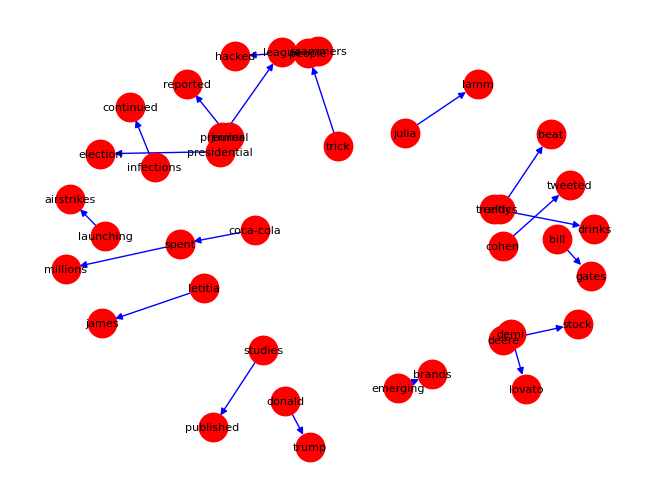

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(df=bigrams_tf_idf.head(20), source='word1', target='word2', edge_attr='n', create_using=nx.DiGraph())

nx.draw(G, pos=nx.spring_layout(G, k=1.45, iterations=220), node_size=420, font_size=8, node_color='r', edge_color='b', with_labels=True)

plt.show()

# Topic modelling

### Considering we are looking at news articles we would like to classify them. For this i will use [Latent Dirichlet Allocation](https://radimrehurek.com/gensim/models/ldamodel.html) (LDA). 
### We will start by using gensim's [Pharses](https://radimrehurek.com/gensim/models/phrases.html) to find common bigrams and store them as a single token.
### After that we construct word<->id mappings using [Dictionary](https://radimrehurek.com/gensim/corpora/dictionary.html) and then   bag-of-words
### Finally we construct the LDA models and choose the best one. 

In [13]:
warnings.filterwarnings(action='ignore', module='gensim')
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

In [14]:
bigram = gensim.models.Phrases(news['tokens'], min_count=1, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
news['tokens_w_bigrams'] = news['tokens'].map(lambda tokens: bigram_mod[tokens])

id2word = corpora.Dictionary(news['tokens_w_bigrams'])
texts = news['tokens_w_bigrams'].values

gensim_dictionary = corpora.Dictionary(texts)
gensim_corpus = [gensim_dictionary.doc2bow(token, allow_update=True) for token in texts]

In [21]:
max_models = 5
coherence_scores = []
models = []
for num_topics in range(1,max_models + 1):
    LDA_model = gensim.models.ldamulticore.LdaMulticore(gensim_corpus,
                                               id2word=id2word,
                                               #random_state=100,
                                               num_topics=num_topics, 
                                               passes=1,
                                            )
    models.append(LDA_model)
    coherence_model = CoherenceModel(model=LDA_model, texts=texts, dictionary=gensim_dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())
    print("Finished for num_topics:",num_topics)
    print('Perplexity Score: ', LDA_model.log_perplexity(gensim_corpus))
    print('Coherence Score:', coherence_scores[num_topics-1])


Finished for num_topics: 1
Perplexity Score:  -8.139243056289338
Coherence Score: 0.6736465581022497
Finished for num_topics: 2
Perplexity Score:  -8.427165757863161
Coherence Score: 0.6976126762541677
Finished for num_topics: 3
Perplexity Score:  -8.532499878693168
Coherence Score: 0.6872330122341489
Finished for num_topics: 4
Perplexity Score:  -8.598239473968905
Coherence Score: 0.6786829707168307
Finished for num_topics: 5
Perplexity Score:  -8.620034950761953
Coherence Score: 0.6568213985853129


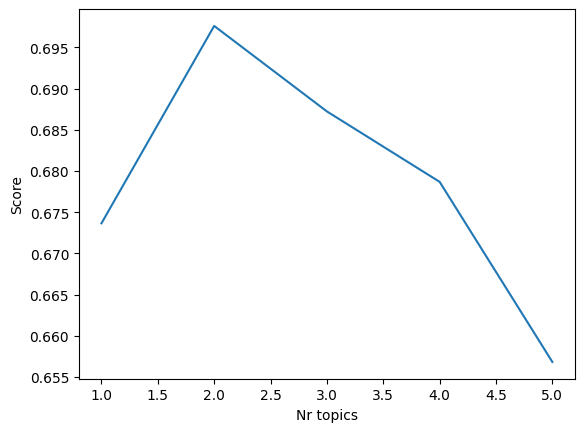

In [22]:
x = range(1, max_models+1)
plt.plot(x,coherence_scores)
plt.xlabel("Nr topics")
plt.ylabel("Score")
plt.show()

In [23]:
optimal_model = models[coherence_scores.index(max(coherence_scores))]
optimal_model.print_topics(num_words=10)

[(0,
  '0.003*"people" + 0.002*"covid" + 0.002*"pany" + 0.002*"years" + 0.002*"israel" + 0.002*"work" + 0.002*"state" + 0.002*"game" + 0.002*"tuesday" + 0.002*"day"'),
 (1,
  '0.003*"people" + 0.002*"news" + 0.002*"apple" + 0.002*"years" + 0.002*"tuesday" + 0.002*"year" + 0.002*"thursday" + 0.002*"ing" + 0.002*"pany" + 0.002*"video"')]

In [24]:
import pyLDAvis.gensim

lda_visualization = pyLDAvis.gensim.prepare(optimal_model, gensim_corpus, gensim_dictionary, sort_topics=False)
pyLDAvis.display(lda_visualization)


# 8. Sentiment analysis

### We would also want to classify the sentiment of the article as positive or negative or neutral. To do this i chose to use [vader](https://www.nltk.org/_modules/nltk/sentiment/vader.html), it's combining positive, negative and neutral values to obtain the overall sentiment of the text.

### There are other methods to do sentiment analysis with better results, for now vader should be enough for this part. 

In [25]:
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\God\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def analyse(tokens):
    sentence = TreebankWordDetokenizer().detokenize(tokens)
    score = analyser.polarity_scores(sentence)
    return score

results = []
for i in range(0,len(news)):
    try:
        score = analyse(news["tokens"][i])
        score['headline'] = news['title'][i]
        results.append(score)
    except: 
        continue

sentiment_df = pd.DataFrame.from_records(results)
sentiment_df['label'] = 0
sentiment_df.loc[sentiment_df['compound'] > 0, 'label'] =1
sentiment_df.loc[sentiment_df['compound'] < 0, 'label'] = -1

sentiment_df

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,IOC offers medical help for Tokyo Olympics as ...,0
1,0.371,0.629,0.000,-0.8807,UK police to excavate cafe in search for remai...,-1
2,0.000,0.000,0.000,0.0000,NT government concludes investigation into com...,0
3,0.767,0.233,0.000,-0.5106,Australian citizen Sunil Khanna dies from COVI...,-1
4,0.000,1.000,0.000,0.0000,Somerton Man remains exhumed after dig in Adel...,0
...,...,...,...,...,...,...
402,0.571,0.429,0.000,-0.8402,'Every incendiary ingredient imaginable': Here...,-1
403,0.381,0.619,0.000,-0.5106,"A college closed, upending one veteran’s life....",-1
404,0.448,0.552,0.000,-0.8442,"Mikayla Miller, a Black teen whose body was fo...",-1
405,0.000,0.696,0.304,0.5423,"Demi Lovato comes out as non-binary, changes p...",1


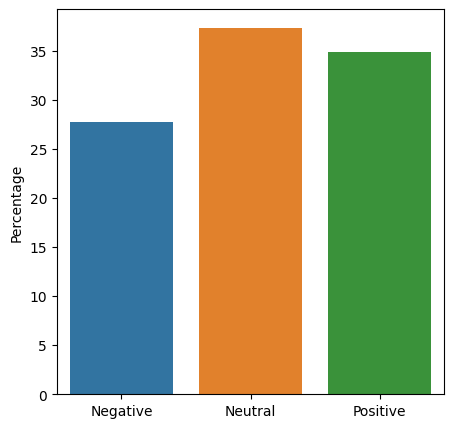

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
count = sentiment_df.label.value_counts(normalize=True) * 100

sns.barplot(x=count.index, y=count, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()

# 9. Conclusions

## The analysis provides the reader relevant information about the breaking news in the world. We could also select local news sources based on our interests to recieve information as fast and as accurate as possible.
## Providing this analysis we've went through most of the algorithms and techniques studied during the laboratory classes, tf-idf to see most used terms in the news today, the relationships between the words using ngrams, topic modelling to try and discover the main topics of the news and we finished with sentiment analysis to determine if today's news are positive or negative

# 10. Bibliography
    
## [News API](https://newsapi.org)
## [Radimrehurek](https://radimrehurek.com/)
## [NLTK](https://nltk.org)
## [Scikit-learn](https://scikit-learn.org/stable/)
 